In [4]:
import pandas as pd

data = pd.read_csv('Baku_final-laps19-24.csv')



In [5]:
def convert_lap_time(lap_time_str):
    minutes, seconds, milliseconds = lap_time_str.split(':')
    return int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000

# Apply the conversion to the FormattedLapTime column
data['LapTimeSeconds'] = data['FormattedLapTime'].apply(convert_lap_time)

# Drop the original FormattedLapTime column as it's no longer needed
data.drop(columns=['FormattedLapTime'], inplace=True)
data.drop(columns=['WindDirection'], inplace=True)
data.drop(columns=['Rainfall'], inplace=True)

In [6]:
data.columns

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Compound',
       'Team', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'LapTimeSeconds'],
      dtype='object')

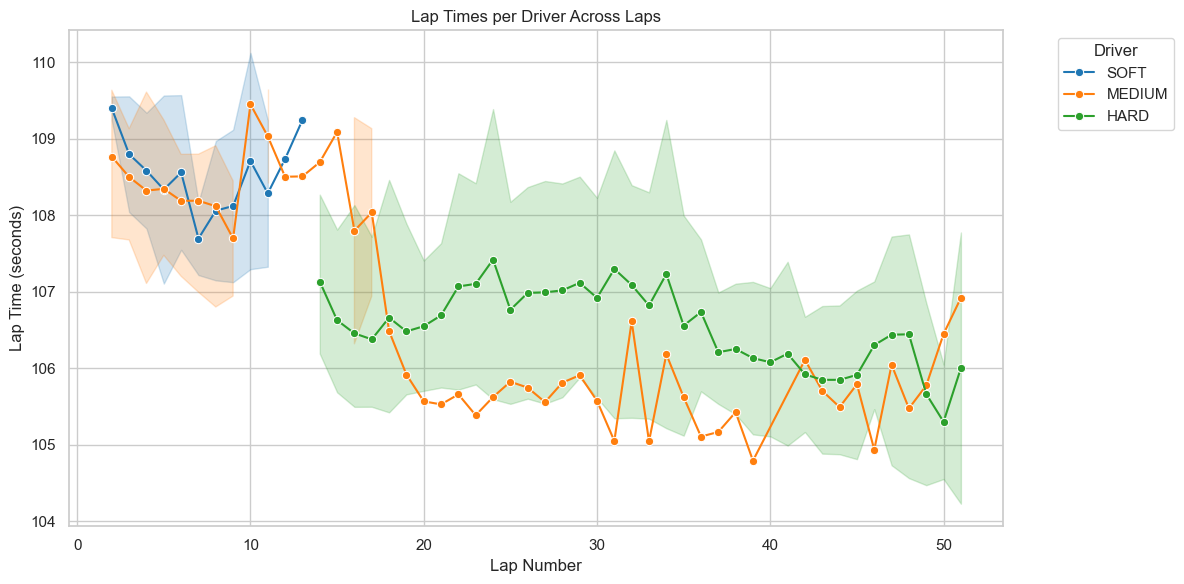

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot lap times for each driver
plt.figure(figsize=(12, 6))

driver_name = 'VER'  # Replace with the actual driver name you want to visualize
driver_df = data[data['Driver'] == driver_name]

# Using seaborn lineplot for easier grouping by 'Driver'
sns.lineplot(data=driver_df, x='LapNumber', y='LapTimeSeconds', hue='Compound', marker='o', palette='tab10')

# Set plot labels and title
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Times per Driver Across Laps")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot


# Show plot
plt.tight_layout()
plt.show()

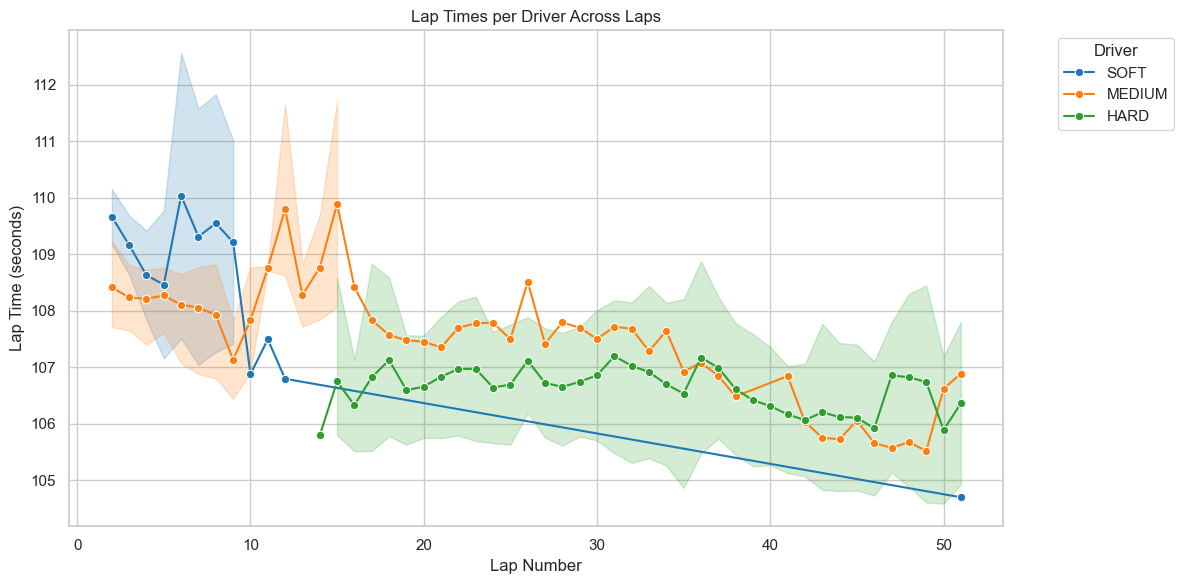

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot lap times for each driver
plt.figure(figsize=(12, 6))

driver_name = 'PER'  # Replace with the actual driver name you want to visualize
driver_df = data[data['Driver'] == driver_name]

# Using seaborn lineplot for easier grouping by 'Driver'
sns.lineplot(data=driver_df, x='LapNumber', y='LapTimeSeconds', hue='Compound', marker='o', palette='tab10')

# Set plot labels and title
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Times per Driver Across Laps")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

# Show plot
plt.tight_layout()
plt.show()

One Hot Encoded - Compound


In [9]:
data_encoded = pd.get_dummies(data, columns=[ 'Compound'], drop_first=True)
data_encoded.style.set_sticky(axis="columns")
print(data_encoded.columns)
data_encoded.head(20)

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Team',
       'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'LapTimeSeconds', 'Compound_MEDIUM', 'Compound_SOFT'],
      dtype='object')


,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,Compound_MEDIUM,Compound_SOFT
0,GAS,10,2.0,1.0,2.0,Red Bull Racing,20.3,48.1,1013.9,42.4,0.6,113.143,True,False
1,GAS,10,3.0,1.0,3.0,Red Bull Racing,20.3,49.5,1013.8,41.8,1.1,108.425,True,False
2,GAS,10,4.0,1.0,4.0,Red Bull Racing,20.0,49.6,1013.9,41.8,1.7,108.557,True,False
3,GAS,10,5.0,1.0,5.0,Red Bull Racing,20.1,50.8,1014.0,41.5,1.6,112.738,True,False
4,GAS,10,6.0,1.0,6.0,Red Bull Racing,20.1,51.1,1013.9,41.3,1.4,112.123,True,False
5,GAS,10,7.0,1.0,7.0,Red Bull Racing,20.1,51.3,1014.0,41.5,0.8,109.110,True,False
6,GAS,10,8.0,1.0,8.0,Red Bull Racing,20.2,51.7,1014.0,41.3,0.9,109.011,True,False
7,GAS,10,9.0,1.0,9.0,Red Bull Racing,20.0,53.3,1013.9,41.3,1.4,111.938,True,False
8,GAS,10,10.0,1.0,10.0,Red Bull Racing,19.9,52.7,1013.9,41.1,0.8,111.634,True,False
9,GAS,10,11.0,1.0,11.0,Red Bull Racing,19.8,52.1,1013.9,41.1,0.9,108.110,True,False


Featrue Engineering on Tyre Compound


In [10]:
data_encoded['TyreDegradation'] = data_encoded['TyreLife'] * \
    (data_encoded['Compound_SOFT'] if 'Compound_SOFT' in data_encoded else 0) + \
    (data_encoded['TyreLife'] * 0.8 * (data_encoded['Compound_MEDIUM'] if 'Compound_MEDIUM' in data_encoded else 0)) + \
    (data_encoded['TyreLife'] * 0.5 * (data_encoded['Compound_HARD'] if 'Compound_HARD' in data_encoded else 0))

data_encoded.head(10)

,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,Compound_MEDIUM,Compound_SOFT,TyreDegradation
0,GAS,10,2.0,1.0,2.0,Red Bull Racing,20.3,48.1,1013.9,42.4,0.6,113.143,True,False,1.6
1,GAS,10,3.0,1.0,3.0,Red Bull Racing,20.3,49.5,1013.8,41.8,1.1,108.425,True,False,2.4
2,GAS,10,4.0,1.0,4.0,Red Bull Racing,20.0,49.6,1013.9,41.8,1.7,108.557,True,False,3.2
3,GAS,10,5.0,1.0,5.0,Red Bull Racing,20.1,50.8,1014.0,41.5,1.6,112.738,True,False,4.0
4,GAS,10,6.0,1.0,6.0,Red Bull Racing,20.1,51.1,1013.9,41.3,1.4,112.123,True,False,4.8
5,GAS,10,7.0,1.0,7.0,Red Bull Racing,20.1,51.3,1014.0,41.5,0.8,109.110,True,False,5.6
6,GAS,10,8.0,1.0,8.0,Red Bull Racing,20.2,51.7,1014.0,41.3,0.9,109.011,True,False,6.4
7,GAS,10,9.0,1.0,9.0,Red Bull Racing,20.0,53.3,1013.9,41.3,1.4,111.938,True,False,7.2
8,GAS,10,10.0,1.0,10.0,Red Bull Racing,19.9,52.7,1013.9,41.1,0.8,111.634,True,False,8.0
9,GAS,10,11.0,1.0,11.0,Red Bull Racing,19.8,52.1,1013.9,41.1,0.9,108.110,True,False,8.8


Fuel Load Calculation


In [11]:
data_encoded['Fuel_Load']= 1-(data_encoded['LapNumber']/50)
data_encoded.head(10)

,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,Compound_MEDIUM,Compound_SOFT,TyreDegradation,Fuel_Load
0,GAS,10,2.0,1.0,2.0,Red Bull Racing,20.3,48.1,1013.9,42.4,0.6,113.143,True,False,1.6,0.96
1,GAS,10,3.0,1.0,3.0,Red Bull Racing,20.3,49.5,1013.8,41.8,1.1,108.425,True,False,2.4,0.94
2,GAS,10,4.0,1.0,4.0,Red Bull Racing,20.0,49.6,1013.9,41.8,1.7,108.557,True,False,3.2,0.92
3,GAS,10,5.0,1.0,5.0,Red Bull Racing,20.1,50.8,1014.0,41.5,1.6,112.738,True,False,4.0,0.90
4,GAS,10,6.0,1.0,6.0,Red Bull Racing,20.1,51.1,1013.9,41.3,1.4,112.123,True,False,4.8,0.88
5,GAS,10,7.0,1.0,7.0,Red Bull Racing,20.1,51.3,1014.0,41.5,0.8,109.110,True,False,5.6,0.86
6,GAS,10,8.0,1.0,8.0,Red Bull Racing,20.2,51.7,1014.0,41.3,0.9,109.011,True,False,6.4,0.84
7,GAS,10,9.0,1.0,9.0,Red Bull Racing,20.0,53.3,1013.9,41.3,1.4,111.938,True,False,7.2,0.82
8,GAS,10,10.0,1.0,10.0,Red Bull Racing,19.9,52.7,1013.9,41.1,0.8,111.634,True,False,8.0,0.80
9,GAS,10,11.0,1.0,11.0,Red Bull Racing,19.8,52.1,1013.9,41.1,0.9,108.110,True,False,8.8,0.78


Boolean Columns to 0/1


In [12]:
data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)
data_encoded.head(10)
print(data.columns)


Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Compound',
       'Team', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'LapTimeSeconds'],
      dtype='object')


C:\Users\Thakk\AppData\Local\Temp\ipykernel_17552\1833284581.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)
C:\Users\Thakk\AppData\Local\Temp\ipykernel_17552\1833284581.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_encoded.loc[:, data_encoded.dtypes == 'bool'] = data_encoded.loc[:, data_encoded.dtypes == 'bool'].astype(int)


Random Forest Initial


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
X = data_encoded.drop(columns=['LapTimeSeconds','Driver','Team'])  # Features
y = data_encoded['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1.8534128034827497
Mean Absolute Error (MAE): 0.6223862151067349
R^2 Score: 0.7456253658578931


In [14]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and you want to scale specific columns, e.g., 'col1' and 'col2'
columns_to_scale = ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed']  # Replace with the columns you want to scale

# Initialize the scaler
scaler = StandardScaler()

data_encoded_new = data_encoded.copy()

# Fit and transform only the specified columns
data_encoded_new[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

data_encoded_new.style.set_sticky(axis="columns")
# Display the scaled DataFrame
print(data_encoded_new.columns)
data_encoded_new.head()

Index(['Driver', 'DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'Team',
       'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed',
       'LapTimeSeconds', 'Compound_MEDIUM', 'Compound_SOFT', 'TyreDegradation',
       'Fuel_Load'],
      dtype='object')


,Driver,DriverNumber,LapNumber,Stint,TyreLife,Team,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,Compound_MEDIUM,Compound_SOFT,TyreDegradation,Fuel_Load
0,GAS,10,2.0,1.0,2.0,Red Bull Racing,-1.526156,-0.296510,0.300881,0.293720,-0.960726,113.143,1,0,1.6,0.96
1,GAS,10,3.0,1.0,3.0,Red Bull Racing,-1.526156,-0.135460,0.272025,0.114315,-0.243019,108.425,1,0,2.4,0.94
2,GAS,10,4.0,1.0,4.0,Red Bull Racing,-1.644912,-0.123957,0.300881,0.114315,0.618228,108.557,1,0,3.2,0.92
3,GAS,10,5.0,1.0,5.0,Red Bull Racing,-1.605327,0.014085,0.329738,0.024612,0.474687,112.738,1,0,4.0,0.90
4,GAS,10,6.0,1.0,6.0,Red Bull Racing,-1.605327,0.048596,0.300881,-0.035190,0.187605,112.123,1,0,4.8,0.88


New Random Forest Regression

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame
X = data_encoded_new.drop(columns=['LapTimeSeconds','Driver','Team'])  # Features
y = data_encoded_new['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 1.8528834834486922
Mean Absolute Error (MAE): 0.6218616847290679
R^2 Score: 0.7456980132410094


In [16]:
data_encoded_new = pd.get_dummies(data_encoded_new, columns=['Driver', 'Team'], drop_first=False)

print(data_encoded_new.columns)
data_encoded_new.head()

Index(['DriverNumber', 'LapNumber', 'Stint', 'TyreLife', 'AirTemp', 'Humidity',
       'Pressure', 'TrackTemp', 'WindSpeed', 'LapTimeSeconds',
       'Compound_MEDIUM', 'Compound_SOFT', 'TyreDegradation', 'Fuel_Load',
       'Driver_ALB', 'Driver_ALO', 'Driver_BEA', 'Driver_BOT', 'Driver_COL',
       'Driver_DEV', 'Driver_GAS', 'Driver_GIO', 'Driver_GRO', 'Driver_HAM',
       'Driver_HUL', 'Driver_KUB', 'Driver_KVY', 'Driver_LAT', 'Driver_LEC',
       'Driver_MAG', 'Driver_MAZ', 'Driver_MSC', 'Driver_NOR', 'Driver_OCO',
       'Driver_PER', 'Driver_PIA', 'Driver_RAI', 'Driver_RIC', 'Driver_RUS',
       'Driver_SAI', 'Driver_SAR', 'Driver_STR', 'Driver_TSU', 'Driver_VER',
       'Driver_VET', 'Driver_ZHO', 'Team_Alfa Romeo', 'Team_Alfa Romeo Racing',
       'Team_AlphaTauri', 'Team_Alpine', 'Team_Aston Martin', 'Team_Ferrari',
       'Team_Haas F1 Team', 'Team_Kick Sauber', 'Team_McLaren',
       'Team_Mercedes', 'Team_RB', 'Team_Racing Point', 'Team_Red Bull Racing',
       'Team_Renau

,DriverNumber,LapNumber,Stint,TyreLife,AirTemp,Humidity,Pressure,TrackTemp,WindSpeed,LapTimeSeconds,...,Team_Haas F1 Team,Team_Kick Sauber,Team_McLaren,Team_Mercedes,Team_RB,Team_Racing Point,Team_Red Bull Racing,Team_Renault,Team_Toro Rosso,Team_Williams
0,10,2.0,1.0,2.0,-1.526156,-0.296510,0.300881,0.293720,-0.960726,113.143,...,False,False,False,False,False,False,True,False,False,False
1,10,3.0,1.0,3.0,-1.526156,-0.135460,0.272025,0.114315,-0.243019,108.425,...,False,False,False,False,False,False,True,False,False,False
2,10,4.0,1.0,4.0,-1.644912,-0.123957,0.300881,0.114315,0.618228,108.557,...,False,False,False,False,False,False,True,False,False,False
3,10,5.0,1.0,5.0,-1.605327,0.014085,0.329738,0.024612,0.474687,112.738,...,False,False,False,False,False,False,True,False,False,False
4,10,6.0,1.0,6.0,-1.605327,0.048596,0.300881,-0.035190,0.187605,112.123,...,False,False,False,False,False,False,True,False,False,False


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Assuming df is your DataFrame
X = data_encoded_new.drop(columns=['LapTimeSeconds'])  # Features
y = data_encoded_new['LapTimeSeconds']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

n_trees = len(rf_model.estimators_)  # Number of trees in the forest
train_predictions = np.zeros((X_train.shape[0], n_trees))
test_predictions = np.zeros((X_test.shape[0], n_trees))

# Store predictions for each tree in the forest
for i, tree in enumerate(rf_model.estimators_):
    train_predictions[:, i] = tree.predict(X_train)
    test_predictions[:, i] = tree.predict(X_test)

# Calculate the average prediction across all trees for both train and test data
avg_train_predictions = np.mean(train_predictions, axis=1)
avg_test_predictions = np.mean(test_predictions, axis=1)

# Calculate Bias: difference between the mean of predictions and the true value
train_bias = np.mean(avg_train_predictions - y_train)
test_bias = np.mean(avg_test_predictions - y_test)

# Calculate Variance: variance of the predictions for the test set
train_variance = np.mean(np.var(train_predictions, axis=1))
test_variance = np.mean(np.var(test_predictions, axis=1))

# Print the results
print(f"Train Bias: {train_bias}")
print(f"Test Bias: {test_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Variance: {test_variance}")

Mean Squared Error (MSE): 1.7498723479092004
Mean Absolute Error (MAE): 0.5468863415435217
R^2 Score: 0.759835942938151
Train Bias: 0.0006491474832809405
Test Bias: -0.023609218390804366
Train Variance: 0.9176347254585903
Test Variance: 1.8889319576211883


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your features (X) and target (y)
X = data_encoded_new.drop('LapTimeSeconds', axis=1)  # Drop your target variable from features
y = data_encoded_new['LapTimeSeconds']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error (MSE): 2.1788822612291243
Mean Absolute Error (MAE): 0.6541347726997703
R^2 Score: 0.5684283261991716
